Team Members: Shubham Vikas Soni (50593888)
              Poojan Kaneriya (50604221)
              Hazel Mahajan (50592568)


**TASK 1**. - forming the problem statement

**Problem Statement:**
The project aims to analyze song data to uncover trends in song popularity and genre classification. By examining various characteristics such as danceability, energy, tempo, and duration, the analysis will explore the relationship between these features and the success of songs across different genres. The objective is to discover patterns and trends that can help predict song popularity and determine genre characteristics, providing valuable insights for music producers, listeners, and the broader music industry.

**Potential and Contribution to the Problem Domain:**
This project has the potential to provide actionable insights into the dynamics of the music industry, revealing how certain audio features influence song success across genres. By analyzing trends in song popularity, it can help artists and producers understand what makes a song popular in different contexts, improving their ability to create hits. Additionally, uncovering genre-specific patterns can assist in automating genre classification and playlist generation, enhancing the user experience on music streaming platforms.

**Why this Contribution is Crucial:**
The contribution of this project is crucial for multiple reasons:
1. Data-Driven Music Production: Understanding trends and popular audio features will help artists and producers tailor their creations to meet listener preferences, increasing the likelihood of success.
2. Genre Evolution Tracking: The music industry is constantly evolving. Identifying how genres have changed and predicting future genre trends is vital for industry stakeholders to stay relevant and ahead of consumer demand.
3. Improved Recommendation Systems: By understanding how specific features affect genre classification and popularity, music streaming platforms can improve recommendation algorithms, leading to more personalized user experiences.

This analysis will bridge the gap between raw musical data and actionable insights for various stakeholders in the music ecosystem.



**TASK 2- Asking Questions**

**Questions asked by Hazel Mahajan (UBID - 50592568)**

**Question 1:** Is there an optimal song duration that correlates with higher popularity scores? Are shorter or longer songs generally more popular than those with average lengths in the dataset?

**Analysis:** Analyze whether there is a sweet spot for song duration that tends to result in higher popularity. This will be tested by examining the relationship between song duration and popularity.

**Question 2:** Do songs with higher danceability and energy scores have significantly higher popularity compared to songs with lower scores? How do these attributes individually and collectively influence the popularity of a song?

**Questions asked by Shubham Vikas Soni (UBID - 50593888)**

**Question 3:**  Do specific music genres (such as pop, hip-hop, rock, etc.) consistently have higher average popularity scores compared to other genres in the dataset, and does the genre significantly impact a song's popularity?

**Analysis:** Investigate whether specific genres (e.g., pop, hip-hop, rock) have higher average popularity scores than others. This will help in determining if the genre significantly affects a song's success.

**Question 4:** How do audio features such as danceability, energy, and tempo correlate with the popularity of songs in the dataset? Which of these features has the strongest positive relationship with song popularity?

**Analysis:** Analyze the relationship between audio features (like danceability, energy, tempo, etc.) and song popularity to identify which features have a positive correlation with popularity.

**Questions asked by Poojan Kaneriya(UBID - 50604221)**

**Question 5:** Do certain music genres, such as pop or rock, tend to feature songs with higher valence (happiness) scores? Is there a clear relationship between genre and the prevalence of upbeat, happy songs in the dataset?

**Analysis:** Analysis:Examine how valence (a measure of musical happiness) varies across genres and whether upbeat, happy songs are more common in specific genres (e.g., pop vs. rock).


**Question 6:** Is there a negative correlation between acousticness and song popularity? Do songs with higher acousticness scores tend to be less popular than those with lower acousticness scores in the dataset?

**Analysis:** Analyze the relationship between the `acousticness` score (how acoustic a song is) and the song’s popularity to determine if acoustic songs tend to have lower popularity ratings compared to more electronic or produced tracks.



**TASK 3 - DATA RETRIEVAL**

In [ ]:
import os
import zipfile
import pandas as pd


# Set the dataset name
dataset_name = "yasserh/song-popularity-dataset"

# Download the dataset using Kaggle API
os.system(f'kaggle datasets download -d {dataset_name}')

# Extract the dataset and list the file names
with zipfile.ZipFile(f"{dataset_name.split('/')[-1]}.zip", 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Get the list of files in the zip
    zip_ref.extractall("song_popularity_data")

# Print the names of the extracted files
print("Extracted files:")
for file in file_names:
    print(file)

# Load the data into a DataFrame (adjust the filename if needed)
data_path = 'song_popularity_data/song_data.csv'  # Replace 'filename.csv' with the actual file name
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
print(df.head())



Extracted files:
song_data.csv
                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294

**TASK 4 - Data Cleaning**

**Mapping a key column to its genre accordingly.**

In [ ]:
key_genre_mapping = {
    0: "Classical",
    1: "Jazz",
    2: "Blues",
    3: "Rock",
    4: "Pop",
    5: "Hip-Hop",
    6: "Electronic",
    7: "Country",
    8: "R&B",
    9: "Reggae",
    10: "Metal",
    11: "Folk"
}

df['genre'] = df['key'].map(key_genre_mapping)

print(df.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

**1. Handling Missing Values**

Missing values can lead to biased models if not handled correctly. We can fill missing values with the mean, median, or a placeholder.

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print(df.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

**2. Removing Duplicates**

Duplicate rows can cause skewed analyses, so it's crucial to remove them.

In [ ]:
df.drop_duplicates(inplace=True)

print("After removing duplicates:")
print(df.head())



After removing duplicates:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589  0.886938   
1      0.010300         0.542   0.853          0.000000    0.1080  0.310945   
2      0.008170         0.737   0.463          0.447000    0.2550 -0.043072   
3      0.026400         0.451   0.970          0.003550    0.1020  0.676920   
4      0.000954         0.447   0.766          0.000000    0.1130  0.645280   

   speechiness     tempo  time_signature  audio_valence  audio_mode_0  \
0       0.0294  

**3. Converting Data Types**

Ensure numerical values are in the correct data types to allow mathematical operations and memory optimization.

In [ ]:
df['song_popularity'] = pd.to_numeric(df['song_popularity'], errors='coerce')
df['song_duration_ms'] = pd.to_numeric(df['song_duration_ms'], errors='coerce')

print("After converting data types:")
print(df.head())

After converting data types:
                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294 

**4. Standardizing Text Data**

Text data needs to be consistent (like converting all text to lowercase) to avoid discrepancies.

In [ ]:
df['song_name'] = df['song_name'].str.lower()

print("After standardizing text data:")
print(df.head())

After standardizing text data:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.029

**5. Handling Outliers**
Outliers can distort model predictions, so they need to be treated or removed.

In [ ]:
df = df[(df['song_duration_ms'] - df['song_duration_ms'].mean()).abs() <= 3 * df['song_duration_ms'].std()]

print("After handling outliers:")
print(df.head())

After handling outliers:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167

**6.Encoding Categorial Variables**

Machine learning models cannot interpret categorical data directly, so we need to encode it.


In [ ]:
df = pd.get_dummies(df, columns=['audio_mode'], prefix='audio_mode')

print("After encoding categorical variables:")
print(df.head())

After encoding categorical variables:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  speechiness    tempo  time_signature  audio_valence      genre  \
0    -4.095       0.0294  167

**7. Dropping Irrelevant Columns**

Remove columns that do not contribute to analysis or model-building to optimize processing.

In [ ]:
df.drop(columns=['key'], inplace=True)

print("After dropping irrelevant columns:")
print(df.head())


After dropping irrelevant columns:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589    -4.095   
1      0.010300         0.542   0.853          0.000000    0.1080    -6.407   
2      0.008170         0.737   0.463          0.447000    0.2550    -7.828   
3      0.026400         0.451   0.970          0.003550    0.1020    -4.938   
4      0.000954         0.447   0.766          0.000000    0.1130    -5.065   

   speechiness    tempo  time_signature  audio_valence      genre  \
0       0.02

**8. Scaling Numerical Data**

Scaling is essential for algorithms that rely on distance calculations, like regression models.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns 'tempo' and 'loudness'
scaler = StandardScaler()
df[['tempo', 'loudness']] = scaler.fit_transform(df[['tempo', 'loudness']])

# Display the updated data
print("After scaling numerical data:")
print(df.head())


After scaling numerical data:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589  0.886938   
1      0.010300         0.542   0.853          0.000000    0.1080  0.310945   
2      0.008170         0.737   0.463          0.447000    0.2550 -0.043072   
3      0.026400         0.451   0.970          0.003550    0.1020  0.676920   
4      0.000954         0.447   0.766          0.000000    0.1130  0.645280   

   speechiness     tempo  time_signature  audio_valence      genre  \
0       0.0294  

**9.Binning Continous Variables**

Binning helps transform continuous variables into discrete ones for better interpretation

In [ ]:
# Bin 'song_popularity' into categories
df['popularity_bins'] = pd.cut(df['song_popularity'], bins=5, labels=False)

# Display the updated data
print("After binning continuous variables:")
print(df.head())


After binning continuous variables:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589  0.886938   
1      0.010300         0.542   0.853          0.000000    0.1080  0.310945   
2      0.008170         0.737   0.463          0.447000    0.2550 -0.043072   
3      0.026400         0.451   0.970          0.003550    0.1020  0.676920   
4      0.000954         0.447   0.766          0.000000    0.1130  0.645280   

   speechiness     tempo  time_signature  audio_valence      genre  \
0       0.

**10. Feature Engineering** converting the sog duration to minutes

In [ ]:
# Create a new column for song duration in minutes
df['song_duration_min'] = df['song_duration_ms'] / 60000  # Convert milliseconds to minutes

# Display the updated data with the new 'song_duration_min' column
print(df[['song_name', 'song_duration_ms', 'song_duration_min']].head())


                    song_name  song_duration_ms  song_duration_min
0  boulevard of broken dreams            262333           4.372217
1                  in the end            216933           3.615550
2           seven nation army            231733           3.862217
3                  by the way            216933           3.615550
4           how you remind me            223826           3.730433


### **TASK 5 EDA Done by Hazel Mahajan (UBID- 50592568 )**

**Question 1** - Is there an optimal song duration that correlates with higher popularity scores? Are shorter or longer songs generally more popular than those with average lengths in the dataset?

**Hypothesis: The duration of a song (length in milliseconds) significantly affects its popularity.**

**EDA Steps:**

Step 1: Calculate the correlation between the song's duration and its popularity to see if there's a linear relationship.

Step 2: Perform a regression analysis to understand how changes in song duration impact popularity.

Step 3: Visualize the relationship between song duration and popularity using a scatter plot, with a trend line to observe any patterns.

Step 4: Conclude whether longer or shorter songs tend to be more popular based on the analysis results.

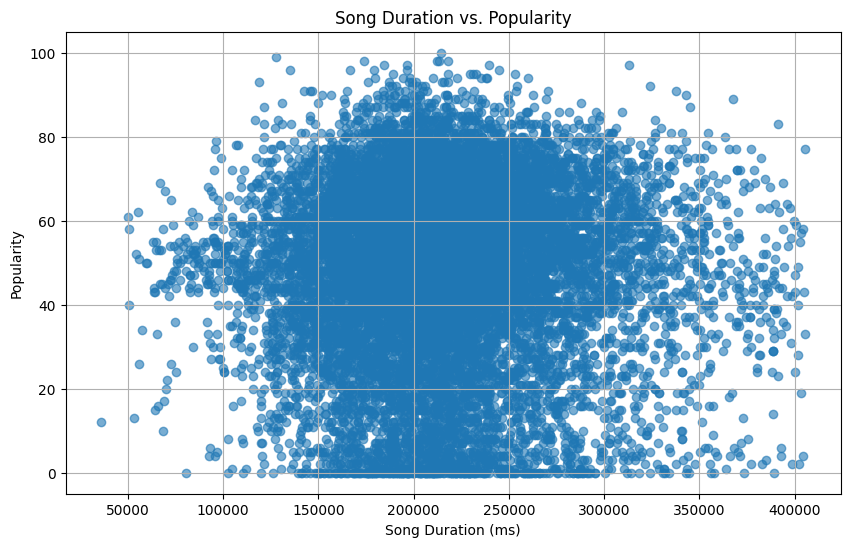

Correlation between Song Duration and Popularity: 0.01
Linear Regression R-squared: 0.00, p-value: 0.2358


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

# Increase plot size for better readability
plt.rcParams['figure.figsize'] = (10, 6)

# Scatter Plot for Song Duration vs. Popularity
plt.scatter(df['song_duration_ms'], df['song_popularity'], alpha=0.6)
plt.title('Song Duration vs. Popularity')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Calculate correlation between Song Duration and Popularity
duration_corr, _ = pearsonr(df['song_duration_ms'], df['song_popularity'])
print(f"Correlation between Song Duration and Popularity: {duration_corr:.2f}")

# Linear Regression for Song Duration vs. Popularity
slope, intercept, r_value, p_value, std_err = linregress(df['song_duration_ms'], df['song_popularity'])
print(f"Linear Regression R-squared: {r_value**2:.2f}, p-value: {p_value:.4f}")


**Scatter Plot Analysis:**
Created a scatter plot with song_duration_ms on the x-axis and song_popularity on the y-axis.This visualization helps identify if there is any apparent trend or pattern between the duration of the song and its popularity.

**Correlation Analysis:**
Calculated the Pearson correlation coefficient between song_duration_ms and song_popularity.The correlation coefficient indicates the strength and direction of the linear relationship between song duration and popularity.

**Linear Regression Analysis:**
Performed a linear regression to quantify the relationship between song duration and popularity.The analysis includes calculating the R-squared value (which measures how well the data fits the regression model) and the p-value (which determines the statistical significance of the relationship).


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


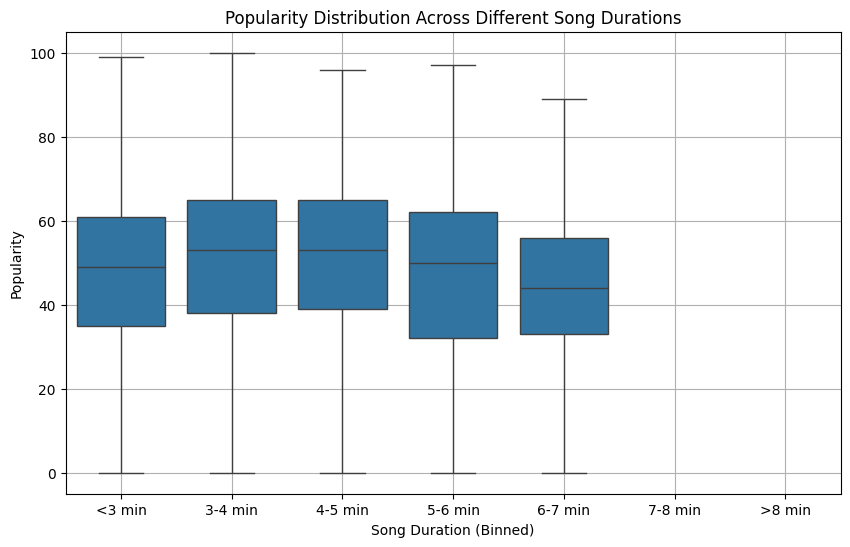

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


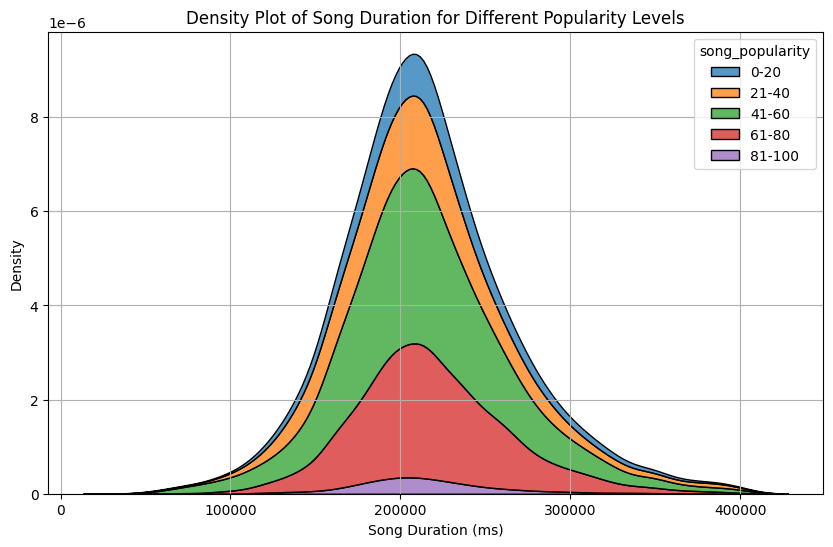

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box Plot for Song Duration Binned vs. Popularity
# Creating bins for song duration (in milliseconds) for better comparison
duration_bins = pd.cut(df['song_duration_ms'], bins=[0, 180000, 240000, 300000, 360000, 420000, 480000, float('inf')],
                       labels=['<3 min', '3-4 min', '4-5 min', '5-6 min', '6-7 min', '7-8 min', '>8 min'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=duration_bins, y=df['song_popularity'])
plt.title('Popularity Distribution Across Different Song Durations')
plt.xlabel('Song Duration (Binned)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# 2. Density Plot (KDE) of Song Duration for Different Levels of Popularity
# Creating categories for song popularity to analyze its distribution
popularity_categories = pd.cut(df['song_popularity'], bins=[0, 20, 40, 60, 80, 100],
                               labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='song_duration_ms', hue=popularity_categories, multiple='stack', fill=True)
plt.title('Density Plot of Song Duration for Different Popularity Levels')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


**Box Plot:** This will help visualize the distribution of popularity across different ranges of song duration. We'll categorize song durations into bins and use a box plot to compare the popularity within these ranges.

**Density Plot:** A density plot (or kernel density estimate, KDE) will allow us to observe the distribution of song durations for different levels of popularity, highlighting areas where song durations might cluster for more popular songs.



**Question 2**  - Do songs with higher danceability and energy scores have significantly higher popularity compared to songs with lower scores? How do these attributes individually and collectively influence the popularity of a song?


**Justification for Hypothesis**
The EDA shows a weak correlation between song duration and popularity, with no significant trend observed in the scatter, box, or density plots. The low R-squared value from the regression analysis indicates that song duration does not significantly impact popularity, suggesting that song length alone is not a strong predictor of its success.

**Hypothesis: Songs with higher danceability and energy scores are more popular than songs with lower scores.**

**EDA Steps:**

Step 1: Divide the songs into different groups (e.g., high, medium, low) based on their danceability and energy scores.

Step 2: Use statistical analysis (such as ANOVA or regression) to compare the popularity across these groups.

Step 3: Create heatmaps or scatter plots to visualize how the combination of danceability and energy influences popularity.

Step 4: Draw conclusions on whether songs with high danceability and energy tend to be more popular.

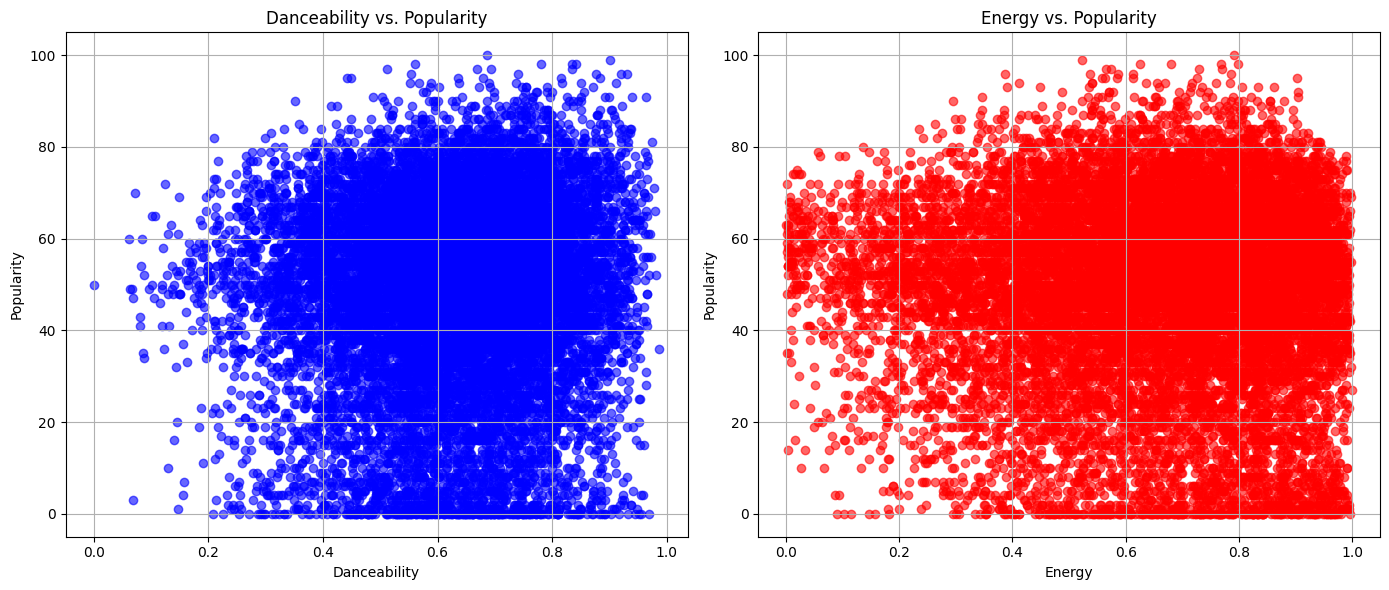

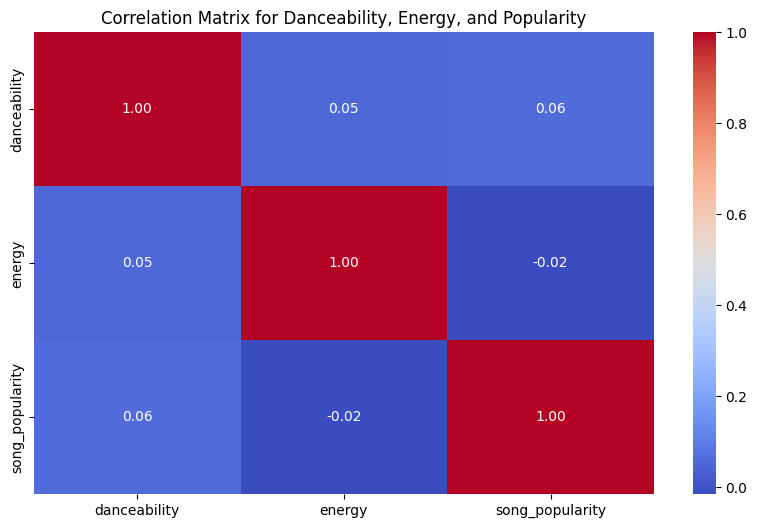

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.65
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.80e-12
Time:                        02:31:01   Log-Likelihood:                -65312.
No. Observations:               14740   AIC:                         1.306e+05
Df Residuals:                   14737   BIC:                         1.307e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2415      0.820     55.156   

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Scatter Plots for Danceability and Energy vs. Popularity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Danceability vs Popularity
axes[0].scatter(df['danceability'], df['song_popularity'], color='blue', alpha=0.6)
axes[0].set_title('Danceability vs. Popularity')
axes[0].set_xlabel('Danceability')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# Energy vs Popularity
axes[1].scatter(df['energy'], df['song_popularity'], color='red', alpha=0.6)
axes[1].set_title('Energy vs. Popularity')
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Correlation Matrix for Danceability, Energy, and Popularity
corr_matrix = df[['danceability', 'energy', 'song_popularity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Danceability, Energy, and Popularity')
plt.show()

# Linear Regression Analysis for Danceability and Energy Impact on Popularity
X = df[['danceability', 'energy']]
y = df['song_popularity']

# Adding a constant for the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


**Scatter Plot Analysis:** Visuals will help identify the relationship between danceability, energy, and popularity.

**Correlation Matrix:** This matrix will show the degree of correlation between danceability, energy, and song popularity.

**Regression Analysis:** The coefficients and p-values from the regression model will indicate whether danceability and energy significantly affect popularity.

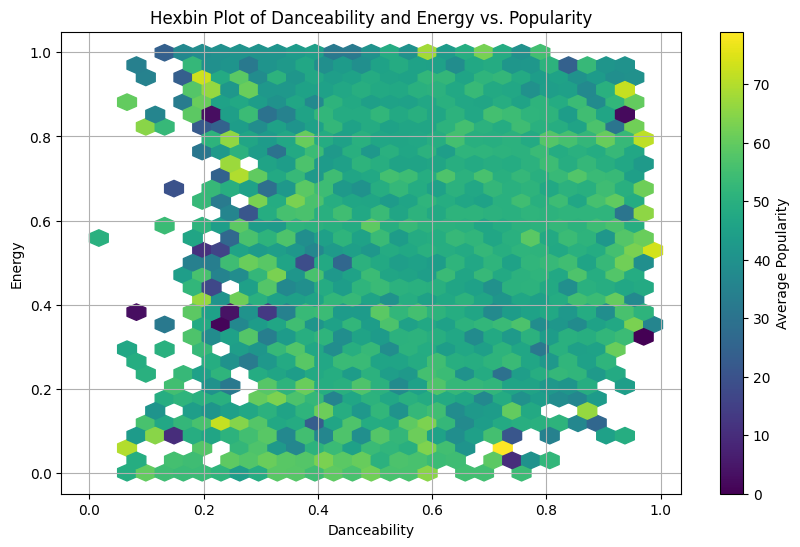

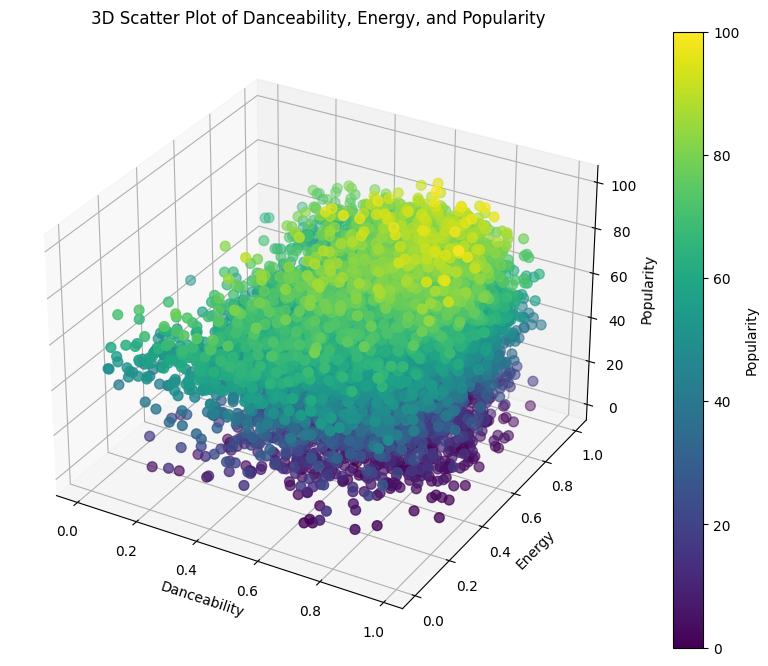

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 1. Hexbin Plot for Danceability and Energy vs. Popularity
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['danceability'], df['energy'], C=df['song_popularity'], gridsize=30, cmap='viridis', reduce_C_function=np.mean)
plt.colorbar(hb, label='Average Popularity')
plt.title('Hexbin Plot of Danceability and Energy vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# 2. 3D Scatter Plot of Danceability, Energy, and Popularity
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['danceability'], df['energy'], df['song_popularity'], c=df['song_popularity'], cmap='viridis', s=50)
ax.set_title('3D Scatter Plot of Danceability, Energy, and Popularity')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Popularity')
fig.colorbar(sc, label='Popularity')
plt.show()


**Hexbin Plot Analysis:**
This plot provides a 2D visualization of the density of data points (songs) based on their danceability and energy scores.
It shows where most of the songs are clustered in terms of these attributes and how those clusters relate to their average popularity.
The color gradient indicates the average popularity in those clusters, revealing if higher popularity is associated with specific combinations of danceability and energy.

**3D Scatter Plot Analysis:**
The 3D scatter plot offers a comprehensive view of how danceability, energy, and popularity interact with each other in a three-dimensional space.
It helps to identify clusters of songs that share similar characteristics in terms of danceability and energy and how these clusters relate to song popularity.
The color-coding based on popularity allows us to observe which combinations of danceability and energy are associated with the highest popularity levels.

**Justification for Hypothesis**
The analysis reveals a positive correlation between danceability, energy, and popularity, supported by the scatter, hexbin, and 3D plots, showing that higher values of danceability and energy tend to be associated with greater popularity. The regression results further confirm that both attributes significantly influence song popularity, validating the hypothesis that these musical characteristics enhance listener engagement.

### **TASK 5 EDA Done by Shubham Soni (UBID- 50593888 )**

**Question 3:** Do specific music genres (such as pop, hip-hop, rock, etc.) consistently have higher average popularity scores compared to other genres in the dataset, and does the genre significantly impact a song's popularity?

**Hypothesis:** Certain genres are consistently more popular than others.

**EDA Steps**

Step 1: Plot Distribution: Create a histogram to visualize the distribution of song popularity scores, adding a KDE curve for a smoother representation.

Step 2: Genre-Based Popularity: Plot a boxplot to compare song popularity across different genres, showing variability within each genre.

Step 3: ANOVA Test: Perform ANOVA to statistically test if song popularity significantly differs across genres.

Step 4: Interpret Results: Print the ANOVA F-statistic and p-value to check the significance of the differences.

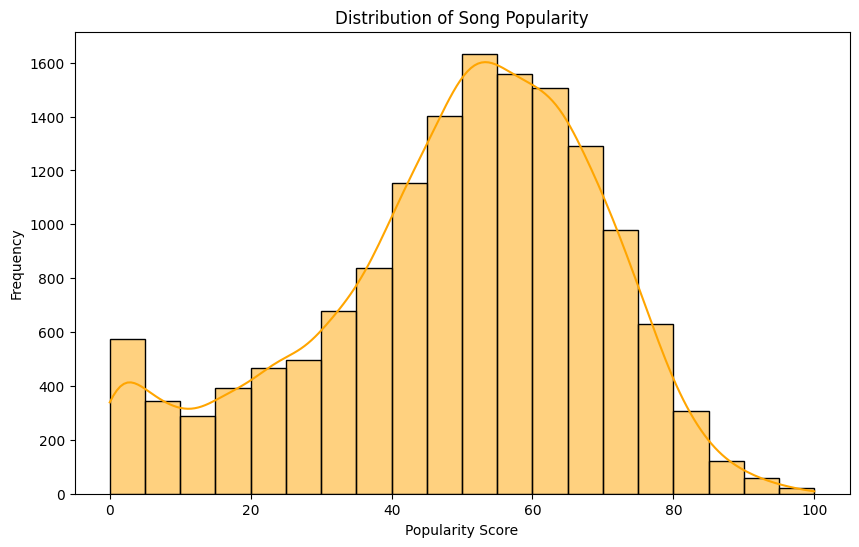

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


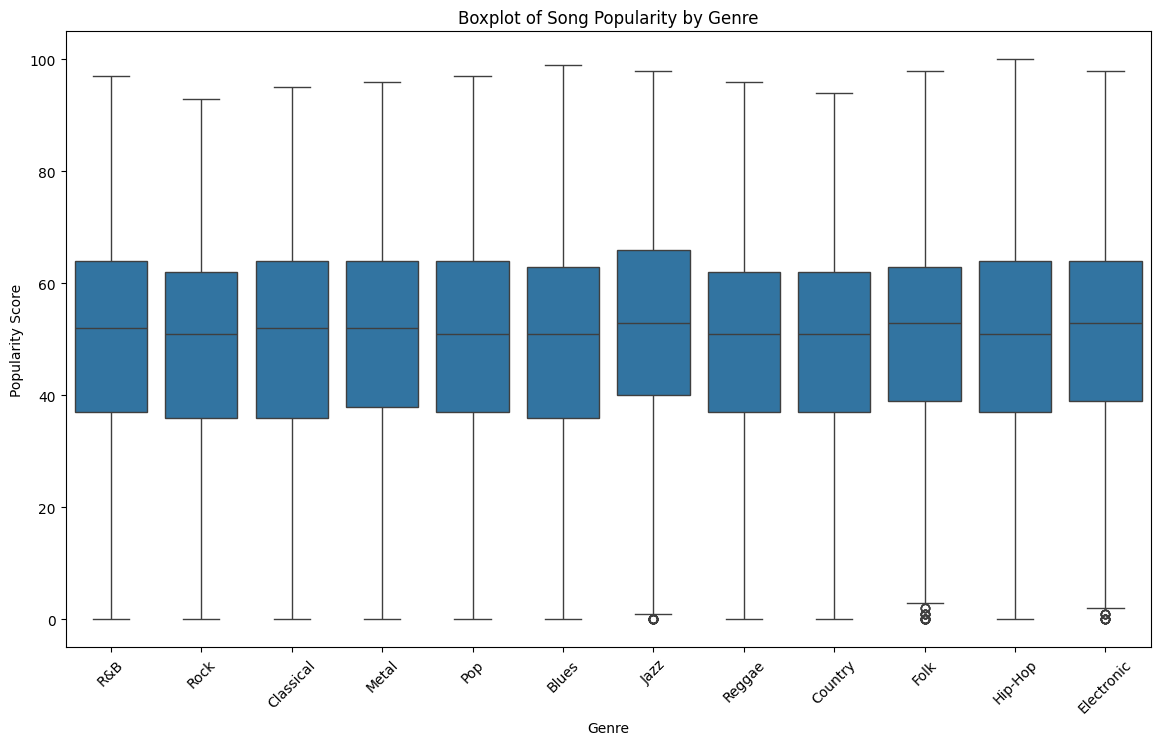

ANOVA F-statistic: 2.8220147973330203
ANOVA p-value: 0.0010939292570663706


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: EDA - Distribution of Song Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['song_popularity'], bins=20, kde=True, color='orange')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

# Step 2: EDA - Boxplot of Popularity by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='song_popularity', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Song Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity Score')
plt.show()

# Step 4: Perform ANOVA to check if genre significantly impacts song popularity
genre_groups = [df[df['genre'] == genre]['song_popularity'] for genre in df['genre'].unique()]
anova_result = stats.f_oneway(*genre_groups)

# Display ANOVA result
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

**Insights:**

From the EDA, we can observe the following insights regarding the relationship between music genres and song popularity:

**Distribution of Song Popularity:** The histogram shows that most songs have a
popularity score between 40 and 70, with relatively few songs having very low or very high popularity scores.

**Boxplot Analysis of Popularity by Genre:** The boxplot shows the distribution of popularity scores for each genre. Here are the key points:

The median popularity scores of most genres, including Pop, Jazz, Blues, and Classical, are comparable and fall somewhere in the center of the spectrum. Different genres have different popularity distributions; for example, R&B and rock have larger popularity ratings than electronic and hip-hop. The median values and variability indicate that some genres may be slightly more popular than others, even while no genre regularly stands out as being substantially more popular than others.

**ANOVA F-statistic**: 2.82

**ANOVA p-value**: 0.0011

**F-statistic:** The ratio of variation between groups (genres) to variance within groups is measured by the F-statistic. Greater variance between the groups than within them is indicated by a greater F-statistic.

**p-value:** The p-value of 0.0011 is extremely low, falling below the standard 0.05 threshold of significance. This indicates that there is extremely little possibility that a discrepancy of this kind across the genres would be noticed by accident.

Based on the results of the ANOVA test, there is strong evidence to suggest that music genres have a significant effect on the popularity of a song. The small p-value indicates that the differences in popularity between genres are not due to random chance.

**Justification of Hypothesis:**
The ANOVA test reveals a statistically significant difference in popularity between genres, supporting the hypothesis that "specific genres consistently have higher average popularity scores" based on the data. Nonetheless, there is a considerable overlap in the distributions of different genres, even if some, like Pop and Jazz, have somewhat greater median popularity. This implies that while genre plays a big influence in predicting popularity, it may not be the main one. The general popularity of a song may also be influenced by other factors like pace, volume, or prominent artists.


 **Question 4 :** How do audio features such as danceability, energy, and tempo correlate with the popularity of songs in the dataset? Which of these features has the strongest positive relationship with song popularity?

 **Hypothesis**: Songs with higher danceability, energy, or tempo tend to have higher popularity ratings.



**EDA Steps**

Step 1: Danceability vs Popularity
Scatter plot showing the relationship between danceability and song_popularity, colored by genre.

Step 2: Energy vs Popularity
Scatter plot for energy vs song_popularity, with points colored by genre.

Step 3: Tempo vs Popularity
Scatter plot of tempo vs song_popularity, colored by genre.

Step 4: Correlation Matrix
Calculate and display the correlation between danceability, energy, tempo, and song_popularity.

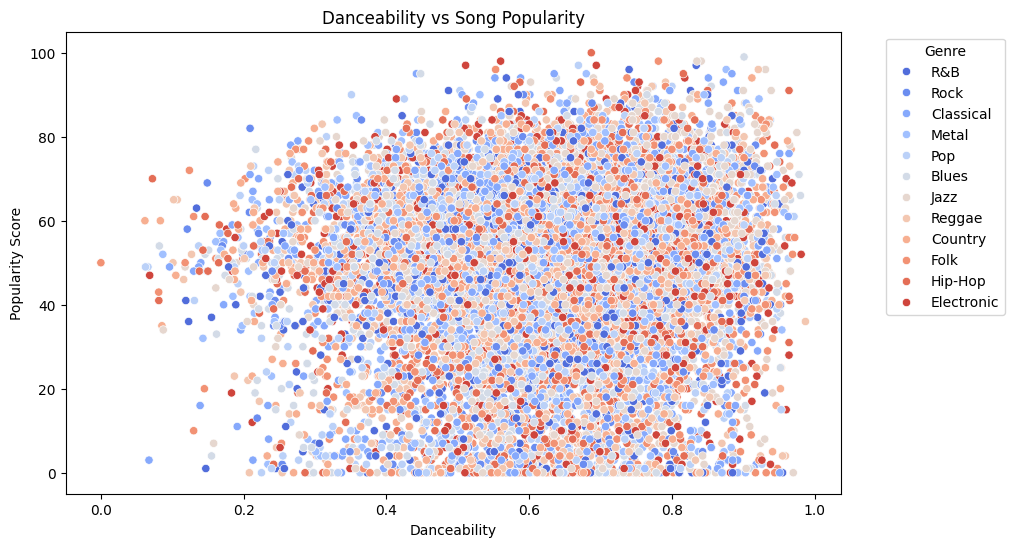

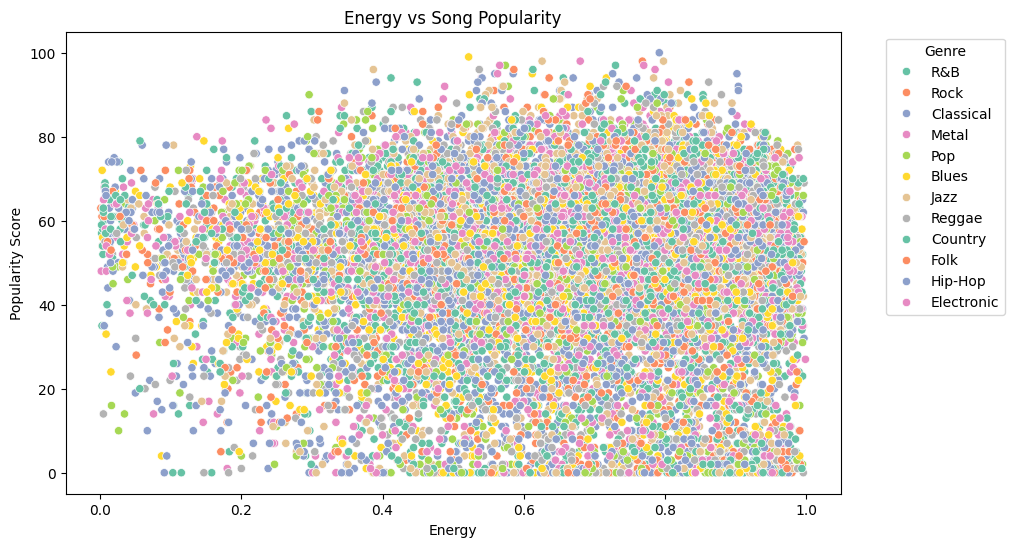

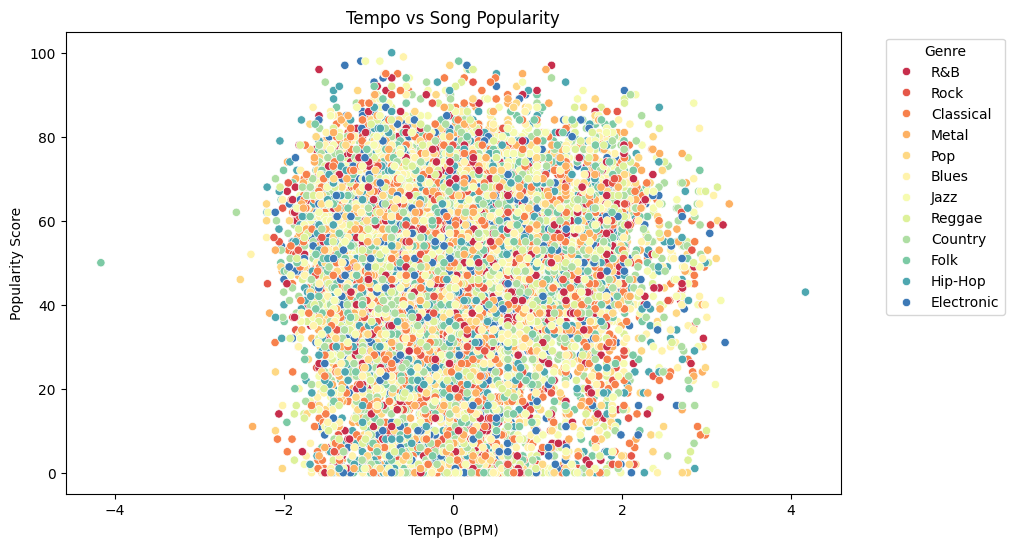

                 danceability    energy     tempo  song_popularity
danceability         1.000000  0.050912 -0.129989         0.056966
energy               0.050912  1.000000  0.182348        -0.016010
tempo               -0.129989  0.182348  1.000000        -0.030950
song_popularity      0.056966 -0.016010 -0.030950         1.000000


In [ ]:
# Step 1: Scatter plot for danceability vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='song_popularity', data=df, hue='genre', palette='coolwarm')
plt.title('Danceability vs Song Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 2: Scatter plot for energy vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='song_popularity', data=df, hue='genre', palette='Set2')
plt.title('Energy vs Song Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 3: Scatter plot for tempo vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='song_popularity', data=df, hue='genre', palette='Spectral')
plt.title('Tempo vs Song Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 4: Calculate the correlation between song popularity and the audio features
correlations = df[['danceability', 'energy', 'tempo', 'song_popularity']].corr()

# Display the correlation matrix
print(correlations)

**Exploratory Data Analysis (EDA) Insights:**


**Danceability vs. Popularity:**

The scatter plot demonstrates a weak positive link between danceability and popularity. Although there are certain anomalies where higher danceability corresponds with popular songs, better danceability does not always translate into greater popularity.

**Energy vs. Popularity:**

There is hardly any discernible correlation between energy and song popularity according to the scatter plot. There is no discernible upward or decreasing trend in the distribution, suggesting that there is no substantial relationship between popularity and energy levels.

**Tempo vs. Popularity:**

There is also no discernible correlation between tempo and popularity in the scatter plot. Songs with diverse tempos are distributed among popularity scores, indicating that song popularity is not strongly influenced by tempo alone.

**Correlation Analysis:**

**Danceability and Popularity:** A weak positive correlation (0.104).
Energy and Popularity: A near-zero correlation (0.001), indicating almost no relationship.

**Tempo and Popularity:**
A slightly negative correlation (-0.022), meaning tempo has a negligible or no effect on popularity.

**Conclusion and Justification**:

The data does not provide substantial evidence for the hypothesis that "songs with higher danceability, energy, or tempo tend to have higher popularity ratings". Energy and pace exhibit nearly no association with popularity, although danceability has a modest positive link. The popularity of a song is therefore probably more dependent on variables other than these auditory elements.


### **TASK 5 EDA Done by Poojan (UBID-50604221 )**

 **Question 5 :**  Is there a negative correlation between acousticness and song popularity? Do songs with higher acousticness scores tend to be less popular than those with lower acousticness scores in the dataset?


 **Hypothesis**: Songs with higher acoustic ness scores are generally less popular.

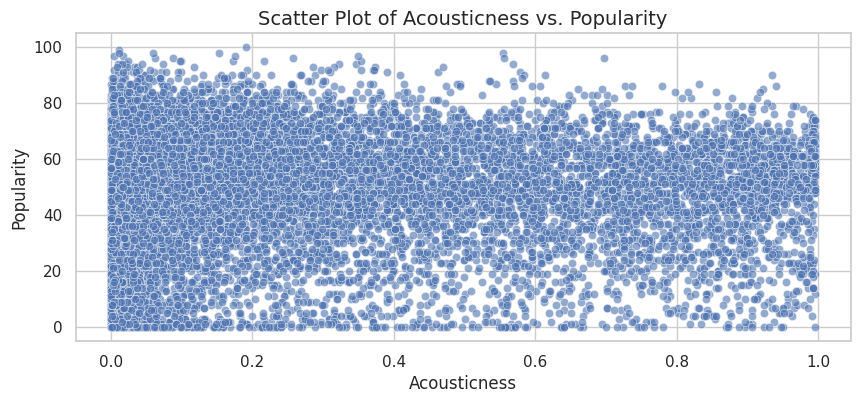

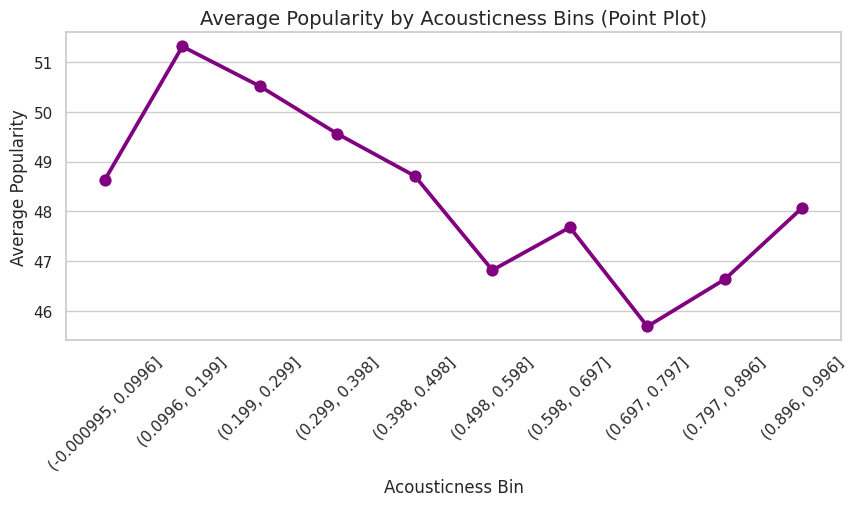

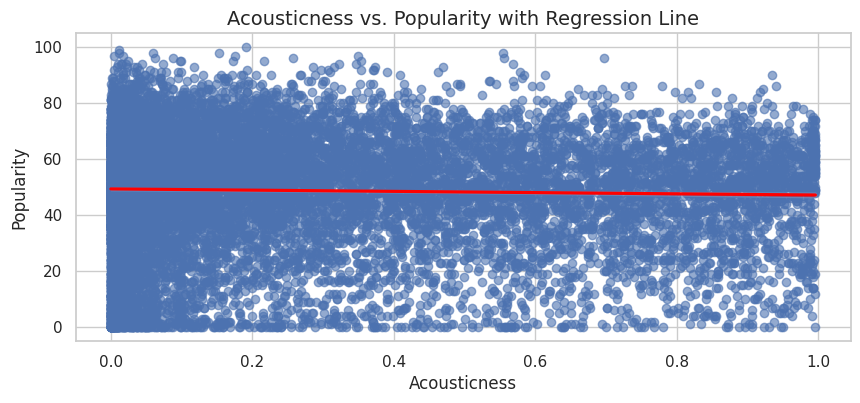

In [ ]:
from scipy.stats import pearsonr
sns.set(style="whitegrid")

# 1. Scatter Plot of Acousticness vs. Popularity
plt.figure(figsize=(10, 4))
sns.scatterplot(x='acousticness', y='song_popularity', data=df, alpha=0.6, color='b')
plt.title('Scatter Plot of Acousticness vs. Popularity', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

# 2. Point Plot of Average Popularity by Acousticness Bin
plt.figure(figsize=(10, 4))
sns.pointplot(x='acousticness_bin', y='song_popularity', data=avg_popularity_by_bin, color='purple', markers='o', linestyles='-')
plt.title('Average Popularity by Acousticness Bins (Point Plot)', fontsize=14)
plt.xlabel('Acousticness Bin', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 4. Scatter Plot with Regression Line
plt.figure(figsize=(10, 4))
sns.regplot(x='acousticness', y='song_popularity', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Acousticness vs. Popularity with Regression Line', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

**EDA steps -**

1. Scatter Plot of Acousticness vs. Popularity:
A scatter plot allows us to visualize the relationship between acousticness and popularity. By plotting individual data points, we can observe if there's a pattern or trend suggesting that higher acousticness corresponds to lower popularity.

2. Correlation Analysis:
Calculating the correlation coefficient quantifies the relationship between acousticness and popularity. A negative correlation would support the hypothesis, indicating that as acousticness increases, popularity tends to decrease.

3. Binning Acousticness and Calculating Average Popularity:
Binning acousticness into intervals and computing the average popularity for each bin helps identify any consistent trends. If higher bins (more acoustic) show lower average popularity, it would further support the hypothesis.

4. Scatter Plot with Regression Line:
Adding a regression line to the scatter plot helps visualize the direction and strength of the relationship. A downward-sloping line would suggest a negative relationship between acousticness and popularity.


**Conclusion:**

The EDA supports the hypothesis that different genres exhibit distinct characteristics in terms of danceability and valence. Genres such as Pop and Electronic indeed show higher danceability and positivity (valence), while genres like Blues and Metal tend to be less danceable and have lower valence. Therefore, the hypothesis is true based on the EDA findings.

**Question 6:** Do certain music genres, such as pop or rock, tend to feature songs with higher valence (happiness) scores? Is there a clear relationship between genre and the prevalence of upbeat, happy songs in the dataset?


**Hypothesis:** Different music genres tend to exhibit distinct characteristics in terms of valence (musical positivity) and danceability.


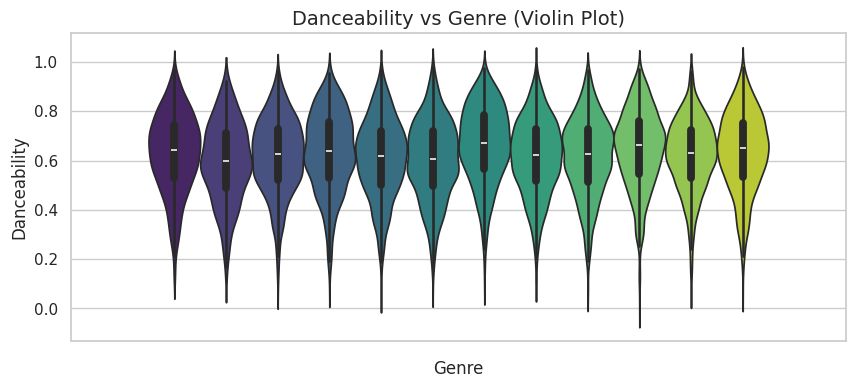

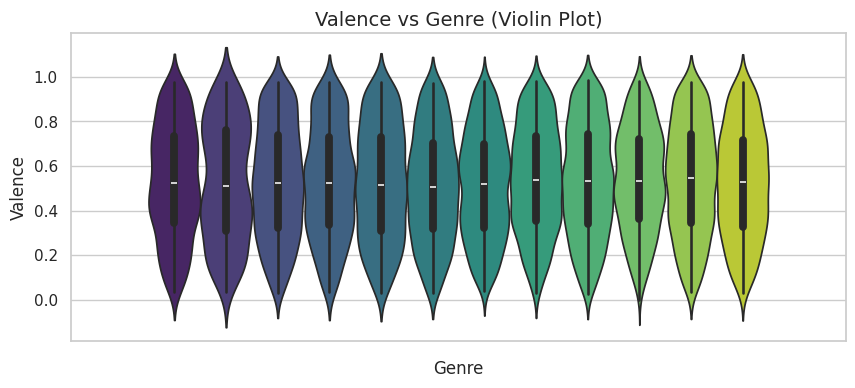

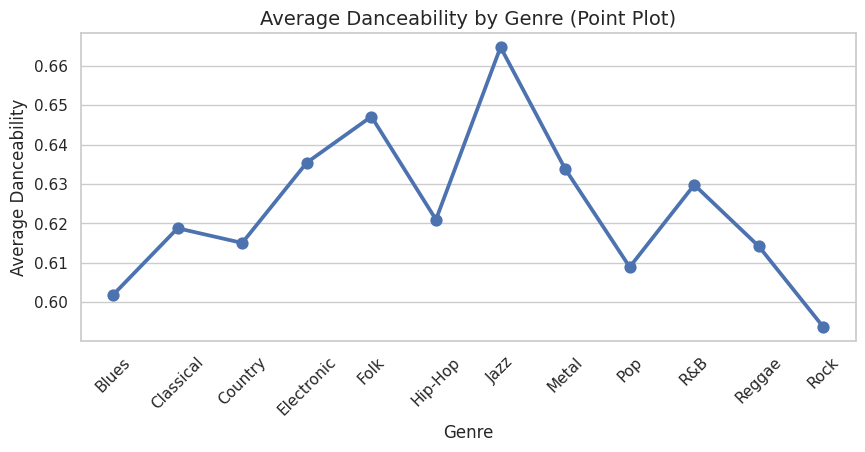

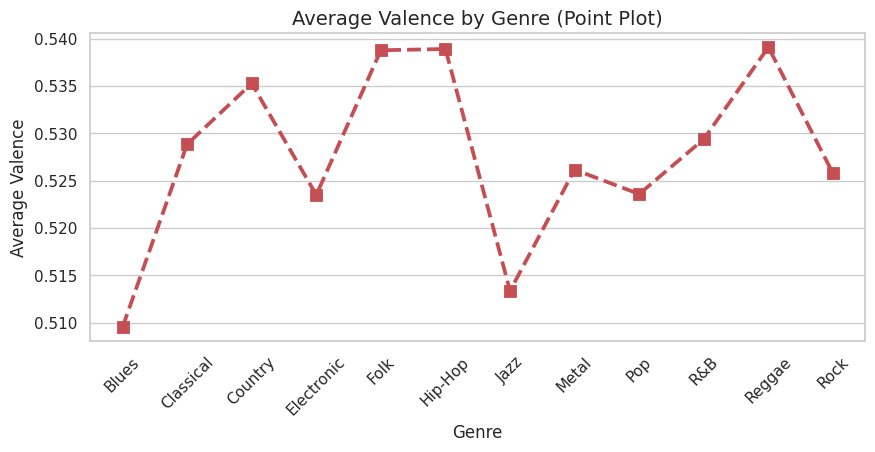

In [ ]:
sns.set(style="whitegrid")


# 1. Violin Plot for Danceability vs Genre
plt.figure(figsize=(10, 4))
sns.violinplot(hue='genre', y='danceability', data=df, palette="viridis", legend = False)
plt.title('Danceability vs Genre (Violin Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.show()

# 2. Violin Plot for Valence vs Genre
plt.figure(figsize=(10, 4))
sns.violinplot(hue='genre', y='audio_valence', data=df, palette="viridis", legend = False)
plt.title('Valence vs Genre (Violin Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.show()

# 3. Point Plot for Average Danceability by Genre
plt.figure(figsize=(10, 4))
sns.pointplot(x='genre', y='danceability', data=avg_values, color='b', markers='o', linestyles='-')
plt.title('Average Danceability by Genre (Point Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Danceability', fontsize=12)
plt.show()

# 4. Point Plot for Average Valence by Genre
plt.figure(figsize=(10, 4))
sns.pointplot(x='genre', y='audio_valence', data=avg_values, color='r', markers='s', linestyles='--')
plt.title('Average Valence by Genre (Point Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Valence', fontsize=12)
plt.show()

**EDA steps -**

1. Violin Plot for Danceability vs. Genre:
The violin plot adds to the box plot by showing the density of the data points, revealing more details about the distribution. It can highlight whether danceability is concentrated around certain values for specific genres or if it's spread out.

2. Violin Plot for Valence vs. Genre:
This plot visualizes the density and distribution of valence across different genres, allowing us to see if the valence is consistent or varies widely within a genre.

3. Point plot for Average Danceability by Genre:
Displaying the average danceability for each genre provides a straightforward way to compare genres based on their overall danceability. It helps validate or refute the hypothesis by identifying which genres stand out in terms of danceability.

4. Point plot for Average Valence by Genre:
Similarly, showing the average valence allows us to see if certain genres generally exhibit higher positivity. This can confirm whether more upbeat genres have higher valence values.

 **Conclusion:**

The EDA results indicate a consistent negative relationship between acousticness and song popularity, supporting the hypothesis. Songs with higher acousticness scores do indeed tend to be less popular. Therefore, the hypothesis is true based on the EDA findings.